In [1]:
!pip install pandoc

In [2]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
# Get all CSV files(each of the 50 events) in the Vertices directory
csv_files = glob.glob("./Vertices/*.csv")

#List to store Flight/Decay Lengths in all 50 events
Decay_Lengths = []
IP_data = []
#Calculate the Flight/Decay Length in each event
for file in csv_files:
    df = pd.read_csv(file)
    filename1 = os.path.splitext(os.path.basename(file))[0]
    event_id = filename1.split('_')[0]
    # print(event_id)
    rows = []
    for index, row in df.iterrows():
        row = row.to_dict()
        rows.append(row)
    # print(rows)
    dl = (rows[0]['posX'] - rows[1]['posX'])**2 + (rows[0]['posY'] - rows[1]['posY'])**2 + (rows[0]['posZ'] - rows[1]['posZ'])**2
    dl = np.sqrt(dl)
    # print(dl)
    data = {}
    data['event'] = event_id
    data['dl'] = dl
    Decay_Lengths.append(data)
    data2 = {}
    data2['event'] = event_id
    data2['posX'] = rows[0]['posX']
    data2['posY'] = rows[0]['posY']
    data2['posZ'] = rows[0]['posZ']
    IP_data.append(data2)
print(Decay_Lengths)

[{'event': '10122012330', 'dl': 1416.4226699682558}, {'event': '10134047875', 'dl': 370.06119764168915}, {'event': '10146003231', 'dl': 521.9276386626802}, {'event': '10158041014', 'dl': 1477.6342578594986}, {'event': '10207022839', 'dl': 578.4112204997452}, {'event': '10248000869', 'dl': 533.1401785646982}, {'event': '10254046659', 'dl': 2403.773389901809}, {'event': '10269013559', 'dl': 3148.6577076589333}, {'event': '10270021561', 'dl': 1803.9087449203205}, {'event': '180718369', 'dl': 3272.2806740865003}, {'event': '222007691', 'dl': 2246.534998614533}, {'event': '222274169', 'dl': 1124.1497987367998}, {'event': '224984190', 'dl': 1985.961477471304}, {'event': '228197639', 'dl': 51.39776259721768}, {'event': '228563573', 'dl': 621.8792004883305}, {'event': '230694744', 'dl': 231.85049061841994}, {'event': '231012915', 'dl': 318.28733873655784}, {'event': '231062848', 'dl': 2703.4185931889983}, {'event': '23311658', 'dl': 210.10218942219498}, {'event': '233225467', 'dl': 782.2536928

In [3]:
for event in Decay_Lengths:
    print(event['dl'])

1416.4226699682558
370.06119764168915
521.9276386626802
1477.6342578594986
578.4112204997452
533.1401785646982
2403.773389901809
3148.6577076589333
1803.9087449203205
3272.2806740865003
2246.534998614533
1124.1497987367998
1985.961477471304
51.39776259721768
621.8792004883305
231.85049061841994
318.28733873655784
2703.4185931889983
210.10218942219498
782.2536928644043
2340.2559368581897
395.21605483583704
1181.5774286943713
1323.6192579439141
312.52911864336875
882.8267440443817
1728.663394070693
147.83098457359446
916.0919440754842
259.939781487946
554.3804289474857
3327.551046941277
1545.7480907314734
840.1482309687977
1653.2950371908828
1246.043490412755
370.53022818658127
660.4185642454337
227.68719770773112
4346.975852244868
1755.6131806294875
279.4317984768391
1136.8828743542526
530.6622089427501
1136.8828743542526
1406.498759331127
4883.479195204986
868.1486796626474
768.2613943183704
659.5198632338465


In [4]:
print(len(Decay_Lengths))
print(IP_data)

50
[{'event': '10122012330', 'posX': 109522.0, 'posY': 87801.6, 'posZ': 3301.8}, {'event': '10134047875', 'posX': 41572.8, 'posY': 54417.9, 'posZ': 58177.6}, {'event': '10146003231', 'posX': 109886.1, 'posY': 43564.0, 'posZ': 15169.4}, {'event': '10158041014', 'posX': 12139.0, 'posY': 57952.3, 'posZ': 65183.0}, {'event': '10207022839', 'posX': 48404.1, 'posY': 46845.8, 'posZ': 44388.5}, {'event': '10248000869', 'posX': 19231.8, 'posY': 50868.4, 'posZ': 39918.5}, {'event': '10254046659', 'posX': 113642.0, 'posY': 91038.2, 'posZ': 57314.2}, {'event': '10269013559', 'posX': 95183.1, 'posY': 23188.6, 'posZ': 25245.0}, {'event': '10270021561', 'posX': 80159.2, 'posY': 22818.1, 'posZ': 59847.4}, {'event': '180718369', 'posX': 60340.3, 'posY': 67066.9, 'posZ': 22068.0}, {'event': '222007691', 'posX': 65779.9, 'posY': 68351.3, 'posZ': 41219.6}, {'event': '222274169', 'posX': 39973.8, 'posY': 17617.9, 'posZ': 67318.5}, {'event': '224984190', 'posX': 54436.9, 'posY': 66596.8, 'posZ': 32240.2}, {

In [6]:
def point_to_line_distance(x1, y1, z1, x2, y2, z2, x3, y3, z3):
    # Define vectors
    P1 = np.array([x1, y1, z1])
    P2 = np.array([x2, y2, z2])
    P3 = np.array([x3, y3, z3])

    # Compute direction vector of the line
    D = P2 - P1

    # Compute vector from P1 to P3
    V = P3 - P1

    #cross product
    cross_product = np.cross(V, D)

    # Computing magnitude
    distance = np.linalg.norm(cross_product) / np.linalg.norm(D)

    return distance

In [7]:
 files = glob.glob("./Tracks/*.csv")
daughter_data = []
for file in files:
    df = pd.read_csv(file)
    filename1 = os.path.splitext(os.path.basename(file))[0]
    event_id = filename1.split('_')[0]
    for index, row in df.iterrows():
        row = row.to_dict()
        if(row['trType'] == 10.0):
            row['event'] = event_id
            daughter_data.append(row)
IP = []
# print(daughter_data)
for event in daughter_data:
    for i in IP_data:
        if(i['event'] == event['event']):
            local = {}
            local['event'] = i['event']
            distance = point_to_line_distance(event['posX1'],event['posY1'],event['posZ1'],event['posX2'],event['posY2'],event['posZ2'],i['posX'],i['posY'],i['posZ'])
            local['IP'] = distance
            IP.append(local)
print(IP)     

[{'event': '10122012330', 'IP': 51.107111308739405}, {'event': '10134047875', 'IP': 20.296320810829698}, {'event': '10146003231', 'IP': 27.356346810704498}, {'event': '10146003231', 'IP': 24.334003682893982}, {'event': '10158041014', 'IP': 53.916005959738015}, {'event': '10207022839', 'IP': 118.52546185717488}, {'event': '10207022839', 'IP': 95.62585662876052}, {'event': '10248000869', 'IP': 180.53051785227672}, {'event': '10248000869', 'IP': 75.1892934446413}, {'event': '10248000869', 'IP': 267.8279938595125}, {'event': '10248000869', 'IP': 129.84979000136784}, {'event': '10254046659', 'IP': 139.36769021649172}, {'event': '10269013559', 'IP': 70.71530064495656}, {'event': '10269013559', 'IP': 320.09322326910495}, {'event': '10270021561', 'IP': 277.1251526589994}, {'event': '180718369', 'IP': 652.7436575839181}, {'event': '222007691', 'IP': 187.7722856944142}, {'event': '222007691', 'IP': 12.102095613045893}, {'event': '222274169', 'IP': 127.9639626864524}, {'event': '222274169', 'IP':

In [8]:
for event in IP:
    print (event['IP'])

51.107111308739405
20.296320810829698
27.356346810704498
24.334003682893982
53.916005959738015
118.52546185717488
95.62585662876052
180.53051785227672
75.1892934446413
267.8279938595125
129.84979000136784
139.36769021649172
70.71530064495656
320.09322326910495
277.1251526589994
652.7436575839181
187.7722856944142
12.102095613045893
127.9639626864524
107.32270102966035
131.98741999343332
40.487412958941626
90.57497310461618
3.9498635010145104
9.9308749250654
9.60489278651711
116.84710281780285
17.95716949424244
6.1704053729370525
33.07001673053147
76.39441805953282
185.85514610224743
75.78742866258835
132.94523611453337
63.75875042390972
191.24543750838782
55.438137090104036
57.43921016260379
16.666024824792544
639.9293717877653
237.74695091003616
260.00469422087355
9.358835437844881
25.253565072122115
25.64111246639974
68.29456199081869
37.076177480079075
47.79700907101323
11.350168050111066
26.425891158674048
94.333508132313
48.975178839620874
135.05745004912242
189.73656195107648
48.

In [10]:
print(Decay_Lengths[0])
print(IP[0])

{'event': '10122012330', 'dl': 1416.4226699682558}
{'event': '10122012330', 'IP': 51.107111308739405}


In [17]:
#Writing 'dl' and 'IP' to txt files
dl_txt = './Decay_Lengths.txt'
ip_txt = './Impact_Params.txt'
with open(dl_txt, "w") as f:
    for i in range(len(Decay_Lengths)):
        if i < len(Decay_Lengths) - 1:
            f.write(str(Decay_Lengths[i]['dl']))
            f.write("\n")
        else:
            f.write(str(Decay_Lengths[i]['dl']))  # No newline after last entry
with open(ip_txt, "w") as f:
    for i in range(len(IP)):
        if i < len(IP) - 1:
            f.write(str(IP[i]['IP']))
            f.write("\n")
        else:
            f.write(str(IP[i]['IP']))  # No newline after last entry

### ROOT HISTOGRAMS WITH THE DATA EXTRACTED ARE AS FOLLOWS:

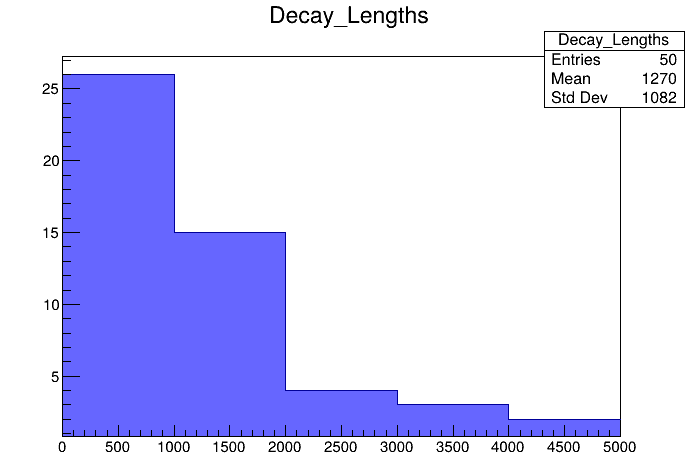

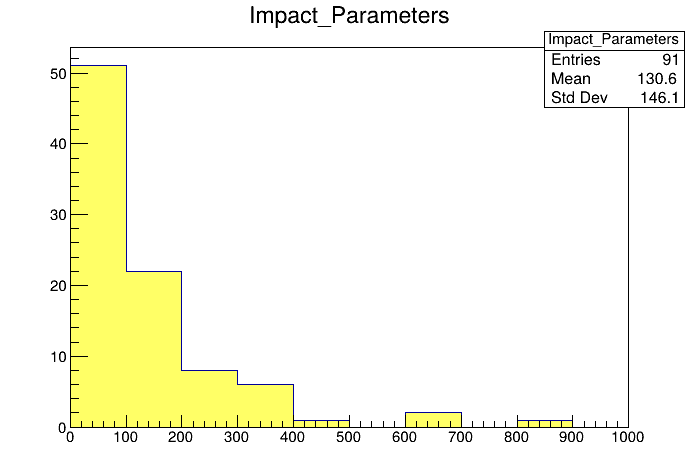